<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">IMPORTING LIBRARIES</h1>
<br>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tkinter import *

%matplotlib inline


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA ANALYSIS</h1>
<br>

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA VISUALIZATION</h1>
<br>

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

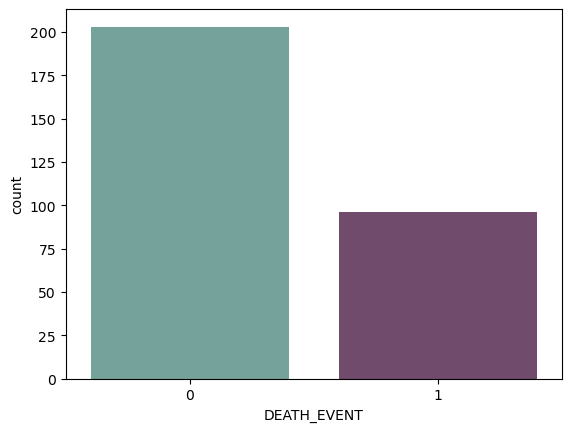

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA MODEL</h1>
<br>

In [46]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [51]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
gender,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [32]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

model = SVC(probability=True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_acc = model.score(X_test, y_test) * 100

print("Model has a score of:", end = "\t")
print(model_acc)

Model has a score of:	89.33333333333333


<AxesSubplot:>

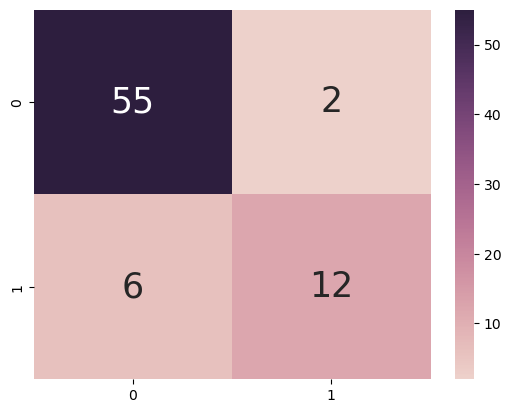

In [11]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

In [41]:
kn_clf = KNeighborsClassifier(n_neighbors=6)

kn_clf.fit(X_train, y_train)

kn_pred = kn_clf.predict(X_test)

kn_acc = kn_clf.score(X_test, y_test) * 100

print("Model has a score of:", end = "\t")
print(kn_acc)

Model has a score of:	81.33333333333333


S:\Anaconda_Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
S:\Anaconda_Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

<AxesSubplot:>

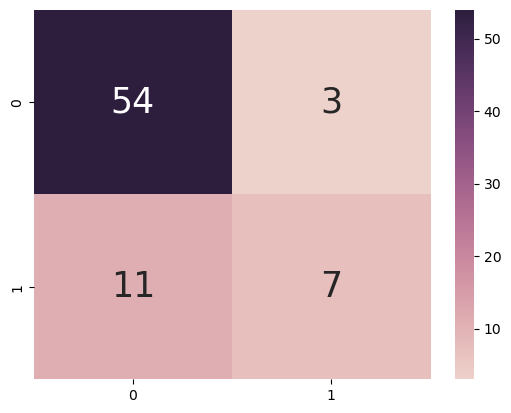

In [20]:
cm = confusion_matrix(y_test, kn_pred)
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">PREDICTING OUTPUT</h1>
<br>

In [57]:
arr = np.array([
                [75,0,582.0,0,20.0,1,265000,1.9,130,1,0,4],
               [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
               [45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280]])

X_new= s_scaler.fit_transform(arr)
X_new = pd.DataFrame(X_new, columns=col_names)

y_pred = model.predict_proba(X_new)

prob = y_pred[0]

print("\nUsing Support Vector Classifier:")
print("\n\nProbability of a Heart Failure is",prob[0] * 100,"%\n\n")


Using Support Vector Classifier:


Probability of a Heart Failure is 10.003423341088713 %




In [58]:
arr = np.array([
                [75,0,582.0,0,20.0,1,265000,1.9,130,1,0,4],
               [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
               [45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280]])

X_new= s_scaler.fit_transform(arr)
X_new = pd.DataFrame(X_new, columns=col_names)

y_pred = kn_clf.predict_proba(X_new)

prob = y_pred[0]

print("\nUsing K-Nearest Neighbours:")
print("\n\nProbability of a Heart Failure is",prob[0] * 100,"%\n\n")


Using K-Nearest Neighbours:


Probability of a Heart Failure is 16.666666666666664 %




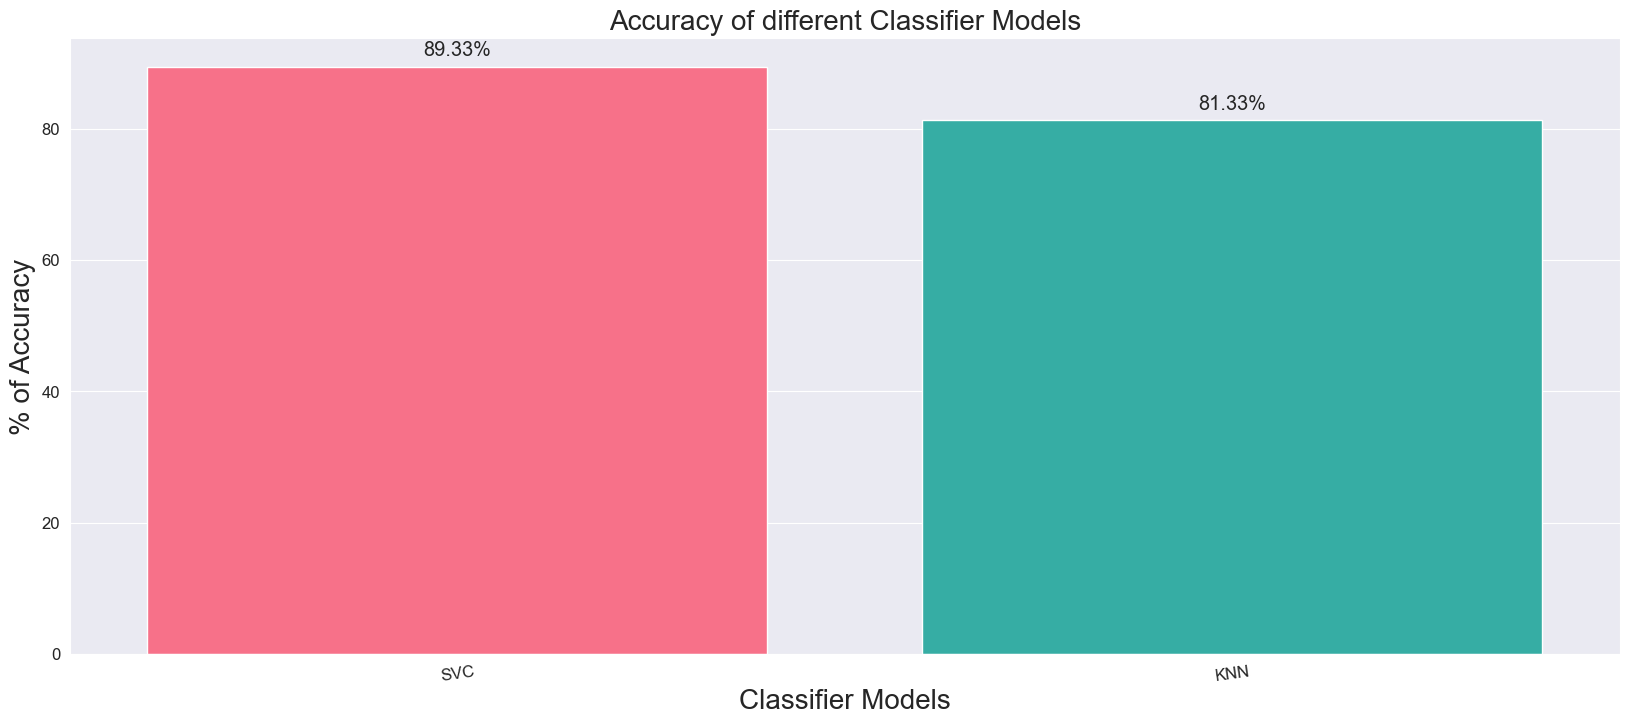

In [60]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=["SVC", "KNN"], y=[model_acc, kn_acc], palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

<br><br><br><br><br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">User Input using Tkinter</h1>
<br>

In [10]:
win= Tk()
win.geometry("800x670")

Label(win, text="HEART FAILURE PREDICTION SYSTEM", height=2, width=35, anchor="e", font= ('Helvetica 18')).grid(row=0,column=1)

l1 = Label(win, text="\tEnter Age: ", height=2, width=60, anchor="w").grid(row=1,column=1)
t1 = Entry(win)
t1.grid(row=1,column=2)

l2 = Label(win, text="\tIf patient has decreased red blood cells(Y/N): ", height=2, width=60, anchor="w").grid(row=2,column=1)
t2 = Entry(win)
t2.grid(row=2,column=2)

l3 = Label(win, text="\tEnter Level of the CPK enzyme in the blood in mcg/L: ", height=2, width=60, anchor="w").grid(row=3,column=1)
t3 = Entry(win)
t3.grid(row=3,column=2)

l4 = Label(win, text="\tIf the patient has diabetic(Y/N): ", height=2, width=60, anchor="w").grid(row=4,column=1)
t4 = Entry(win)
t4.grid(row=4,column=2)

l5 = Label(win, text="\t% of blood leaving the heart at each contraction(Ejection Fraction): ", height=2, width=60, anchor="w").grid(row=5,column=1)
t5 = Entry(win)
t5.grid(row=5,column=2)

l6 = Label(win, text="\tIf patient has high blood pressure?(Y/N): ", height=2, width=60, anchor="w").grid(row=6,column=1)
t6 = Entry(win)
t6.grid(row=6,column=2)

l7 = Label(win, text="\tAmount of platlets: ", height=2, width=60, anchor="w").grid(row=7,column=1)
t7 = Entry(win)
t7.grid(row=7,column=2)

l8 = Label(win, text="\tEnter Level of serum creatinine in the blood mg/dL: ", height=2, width=60, anchor="w").grid(row=8,column=1)
t8 = Entry(win)
t8.grid(row=8,column=2)

l9 = Label(win, text="\tEnter Level of serum sodium in the blood (mEq/L): ", height=2, width=60, anchor="w").grid(row=9,column=1)
t9 = Entry(win)
t9.grid(row=9,column=2)

l10 = Label(win, text="\tEnter Gender of patient(M/F): ", height=2, width=60, anchor="w").grid(row=10,column=1)
t10 = Entry(win)
t10.grid(row=10,column=2)

l11 = Label(win, text="\tDoes patient smoke(Y/N): ", height=2, width=60, anchor="w").grid(row=11,column=1)
t11 = Entry(win)
t11.grid(row=11,column=2)

l12 = Label(win, text="\tTime in care: ", height=2, width=60, anchor="w").grid(row=12,column=1)
t12 = Entry(win)
t12.grid(row=12,column=2)


def callback():
    values = [float(t1.get()), float(t2.get()), float(t3.get()), float(t4.get()), float(t5.get()), float(t6.get()), float(t7.get()), float(t8.get()), float(t9.get()), float(t10.get()), float(t11.get()), float(t12.get())]
    
    arr = np.array([
                values,
               [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
               [45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280]])

    X_new= s_scaler.fit_transform(arr)
    X_new = pd.DataFrame(X_new, columns=col_names)

    y_pred = model.predict_proba(X_new)

    prob = y_pred[0]
    
    result_text = "Result:","Probability of a Heart Failure is",prob[0] * 100
    
    Label(win, text="", height=2, width=60, anchor="w").grid(row=15,column=1)
    res = Label(win, text=result_text, height=2, width=60, anchor="w").grid(row=16,column=1)

Label(win, text="", height=2, width=60, anchor="w", font= ('Helvetica 10')).grid(row=13,column=1)
btn=Button(win, text="Check Probability", command= callback, height=2, width=15, bg="#99ccff").grid(row=14,column=1)

# win.bind('<Return>',lambda event:callback())
win.mainloop()